In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/placement.csv')

In [3]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df.shape

(100, 4)

In [7]:
df = df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [10]:
import matplotlib.pyplot as plt

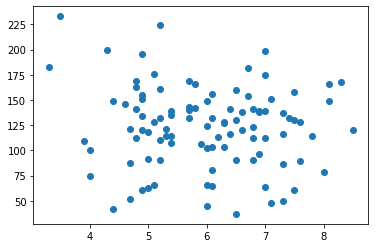

In [14]:
plt.scatter(df['cgpa'],df['iq'])

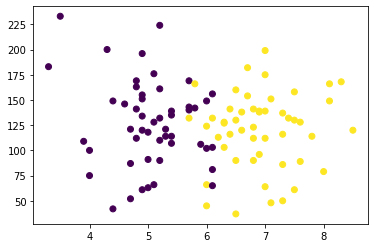

In [13]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [15]:
X = df.iloc[:,0:2]

In [17]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [18]:
Y = df.iloc[:,-1:]

In [19]:
Y.head()

,placement
0,1
1,0
2,0
3,1
4,0


In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [23]:
X_train

,cgpa,iq
14,6.1,103.0
33,6.0,149.0
62,6.0,102.0
36,5.7,140.0
25,5.0,91.0
...,...,...
31,3.9,109.0
9,5.1,66.0
94,4.7,52.0
23,4.7,87.0


In [24]:
Y_train

,placement
14,0
33,0
62,0
36,0
25,0
...,...
31,0
9,0
94,0
23,0


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)

In [28]:
X_test = scaler.transform(X_test)

In [29]:
X_train

array([[ 0.05428753, -0.52999014],
       [-0.03296029,  0.66900394],
       [-0.03296029, -0.55605523],
       [-0.29470373,  0.43441815],
       [-0.90543842, -0.8427712 ],
       [ 0.57777441,  0.79932939],
       [-1.07993405,  1.19030572],
       [ 1.53750036, -0.24327416],
       [-1.07993405, -0.29540434],
       [ 0.83951785,  0.40835306],
       [-0.29470373,  1.19030572],
       [-0.20745591,  1.11211045],
       [-0.55644717,  0.3040927 ],
       [ 1.36300473,  0.12163708],
       [ 0.75227004,  0.38228797],
       [-0.55644717, -0.42572978],
       [ 2.14823506, -0.08688363],
       [-0.29470373,  0.51261341],
       [ 1.27575692,  0.17376726],
       [-1.16718186, -0.06081854],
       [-1.25442968,  0.59080868],
       [-0.73094279, -0.34753452],
       [ 0.40327878,  0.95571992],
       [-1.77791656, -0.6081854 ],
       [-0.99268624, -1.62472387],
       [-1.4289253 ,  0.66900394],
       [ 0.83951785, -0.29540434],
       [ 0.66502222, -0.00868836],
       [ 1.18850911,

In [30]:
X_test

array([[-1.77791656, -1.25981262],
       [-0.64369498, -0.06081854],
       [-0.20745591,  0.48654832],
       [-0.73094279,  2.6238856 ],
       [ 0.05428753, -1.10342209],
       [ 0.57777441,  1.52915187],
       [-0.03296029,  0.01737673],
       [-0.99268624,  0.72113412],
       [-1.4289253 , -2.11996055],
       [ 1.10126129, -0.19114398]])

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
clf = LogisticRegression()

In [33]:
clf.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [34]:
Y_pred = clf.predict(X_test)

In [35]:
Y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1])

In [36]:
Y_test

,placement
68,0
2,0
4,0
16,0
78,0
97,1
27,1
89,0
96,0
72,1


In [37]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(Y_test,Y_pred)

0.9